In [56]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [57]:
shop= pd.read_csv('shopping_trends_updated(in).csv')

In [58]:
shop.shape

(3900, 18)

In [59]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [60]:
shop.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [61]:
shop.columns 

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [62]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [63]:
shop.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [64]:
print(f"The unique values of the Gender column {shop['Gender'].unique()}")
print()
print(f"The unique values of the Category column {shop['Category'].unique()}")
print()
print(f"The unique values of the Size column {shop['Size'].unique()}")
print()
print(f"The unique values of the Shipping Type column {shop['Shipping Type'].unique()}")
print()
print(f"The unique values of the Payment Method column {shop['Payment Method'].unique()}")

The unique values of the Gender column ['Male' 'Female']

The unique values of the Category column ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

The unique values of the Size column ['L' 'S' 'M' 'XL']

The unique values of the Shipping Type column ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']

The unique values of the Payment Method column ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


1. What is the overall distribution of customer ages in the dataset?

In [65]:
shop['Age'].value_counts()

Age
69    88
57    87
41    86
25    85
49    84
54    83
27    83
50    83
62    83
32    82
58    81
19    81
42    80
31    79
28    79
43    79
37    77
29    76
46    76
63    75
59    75
68    75
56    74
36    74
52    73
64    73
55    73
51    72
65    72
45    72
40    72
35    72
47    71
66    71
30    71
23    71
53    70
38    70
18    69
26    69
21    69
34    68
39    68
48    68
24    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

In [66]:
shop['Age'].mean()

np.float64(44.06846153846154)

In [67]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [68]:
shop['Age_Category'] = pd.cut(shop['Age'], bins=[0, 15, 18, 30, 50, 70], 
                               labels=['child', 'teen', 'Young Adult', 'Adult', 'Old'])

fig=px.histogram(shop, x='Age', y='Age_Category')
fig.show()

2. How does the average purchase amount vary across different product categories?

In [69]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [70]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

3. Which gender has the highest number of purchases?

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

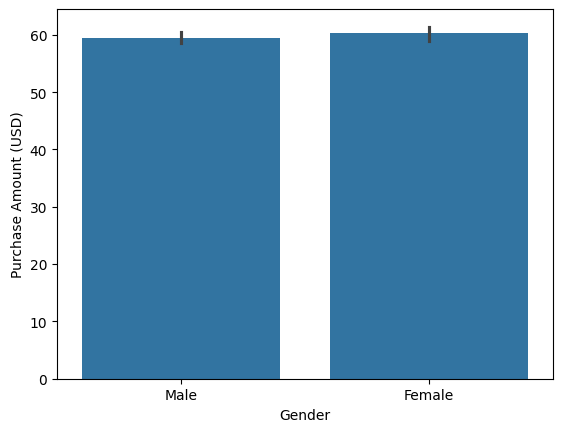

In [71]:
sns.barplot(shop, x='Gender', y='Purchase Amount (USD)')

4. What are the most commonly purchased items in each category?

In [72]:
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

In [73]:
fig=px.histogram(shop, x='Item Purchased', color='Category')
fig.show()

5. Are there any seasons or months where customer spending is significantly higher?

In [74]:
shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [75]:
shop['Season'].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

In [76]:
fig=px.histogram(shop, x='Season', range_y=[800, 1000])
fig.show()

6. What is the average rating given by the customers for each product category?

In [77]:
shop_groupby= shop.groupby('Category')['Review Rating'].mean().reset_index()
print(shop_groupby)

      Category  Review Rating
0  Accessories       3.768629
1     Clothing       3.723143
2     Footwear       3.790651
3    Outerwear       3.746914


In [78]:
fig=px.bar(shop, x='Category', y='Review Rating')
fig.show()

7. Are there notable differences in purchase behaviour between subscribed and non-subscribed customers?

In [79]:
shop['Subscription Status'].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

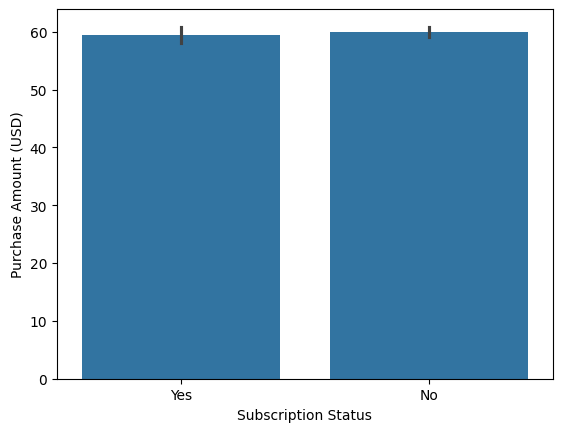

In [80]:
sns.barplot(shop, x='Subscription Status', y='Purchase Amount (USD)')

In [81]:
shop['Purchase Amount (USD)'].sum()

np.int64(233081)

In [82]:
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

8. Which payment system is most popular among customers?

In [83]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

Payment Method
Debit Card       60.915094
Credit Card      60.074516
Bank Transfer    59.712418
Cash             59.704478
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64

In [84]:
shop_groupby=shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

In [85]:
fig= px.bar(shop_groupby, x='Payment Method', y='Purchase Amount (USD)')
fig.show()

9. Do customers who use promo code tend to spend more than those who don't?

In [86]:
shop_groupby=shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

In [87]:
fig= px.sunburst(shop, path=['Gender', 'Promo Code Used'], values='Purchase Amount (USD)')
fig.show()

In [88]:
fig= px.bar(shop_groupby, x='Promo Code Used', y='Purchase Amount (USD)')
fig.show()

10. How does the frequency of purchases vary across different age groups?

In [89]:
shop[['Age', 'Age_Category']]

,Age,Age_Category
0,55,Old
1,19,Young Adult
2,50,Adult
3,21,Young Adult
4,45,Adult
...,...,...
3895,40,Adult
3896,52,Old
3897,46,Adult
3898,44,Adult


In [90]:
shop['Age_Category'].unique()

['Old', 'Young Adult', 'Adult', 'teen']
Categories (5, object): ['child' < 'teen' < 'Young Adult' < 'Adult' < 'Old']

In [91]:
shop_groupby=shop.groupby('Frequency of Purchases')['Age'].sum()
px.sunburst(shop, path=['Frequency of Purchases', 'Age_Category'], values='Age')

11. Are there any correlations between size of product and purchase amount?

In [92]:
shop_groupby=shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

In [93]:
fig= px.bar(shop_groupby, x='Size', y='Purchase Amount (USD)')
fig.show()

12. Which shipping type is preferred by customers for different product categories?

In [94]:
shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending=False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

In [95]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

13. How does the presence of a discount affect the purchase decision of customers?

In [96]:
shop_group=shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()
px.histogram(shop_group, x='Discount Applied', y='Purchase Amount (USD)')

In [97]:
fig=px.sunburst(shop, path=['Gender', 'Discount Applied'], values='Purchase Amount (USD)', color='Gender')
fig.show()

14. Are there specific colors that are more popular among customers?

In [98]:
px.histogram(shop, x='Color')

In [99]:
shop['Color'].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Blue         152
Magenta      152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

15. What is the average number of previous purchases made by a customer?

In [100]:
shop['Previous Purchases'].mean()

np.float64(25.35153846153846)

16. Are there noticable differences in purchase behaviors at different locations?

In [101]:
shop.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

Location
Alaska            67.597222
Pennsylvania      66.567568
Arizona           66.553846
West Virginia     63.876543
Nevada            63.379310
Washington        63.328767
North Dakota      62.891566
Virginia          62.883117
Utah              62.577465
Michigan          62.095890
Tennessee         61.974026
New Mexico        61.901235
Rhode Island      61.444444
Texas             61.194805
Arkansas          61.113924
Illinois          61.054348
Mississippi       61.037500
Massachusetts     60.888889
Iowa              60.884058
North Carolina    60.794872
Wyoming           60.690141
South Dakota      60.514286
New York          60.425287
Ohio              60.376623
Montana           60.250000
Idaho             60.075269
Nebraska          59.448276
New Hampshire     59.422535
Alabama           59.112360
California        59.000000
Indiana           58.924051
Georgia           58.797468
South Carolina    58.407895
Oklahoma          58.346667
Missouri          57.913580
Hawaii     

In [102]:
shop_group=shop.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()
fig=px.bar(shop_group, x='Location', y='Purchase Amount (USD)')
fig.show()

17. Is there relationship between customer age and category of product they purchase?

In [103]:
shop_group=shop.groupby('Category')['Age'].mean().reset_index()

In [104]:
fig=px.bar(shop_group, x='Category', y='Age')
fig.show()


18. How does avergae purchase amount differ between men and women?

In [105]:
shop_group=shop.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()
fig=px.bar(shop_group, x='Gender', y='Purchase Amount (USD)')
fig.show()

In [106]:
px.sunburst(data_frame= shop, path=['Gender', 'Age_Category'], values='Purchase Amount (USD)')

19. What is the distribution of products across different categories?

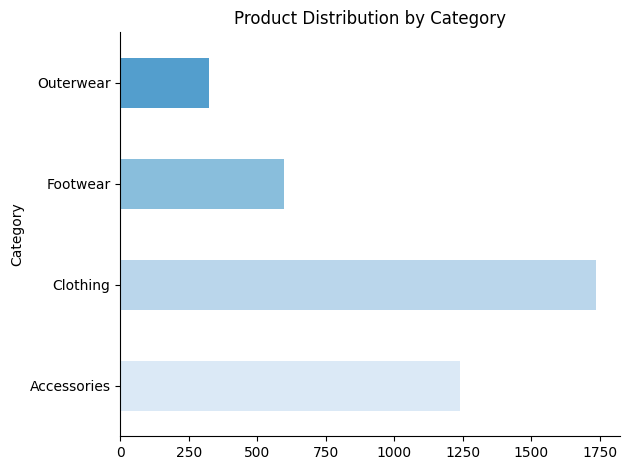

In [107]:
shop.groupby('Category').size().plot(kind='barh', color=sns.color_palette('Blues'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Product Distribution by Category')
plt.tight_layout()
plt.show()

20. What is the distribution of different shipping types used for orders?

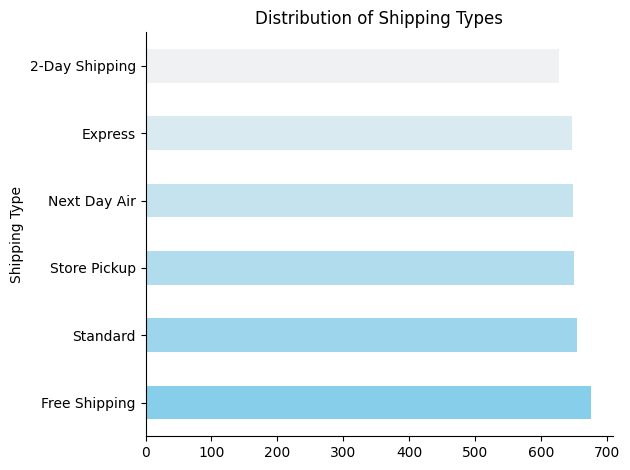

In [108]:
shop['Shipping Type'].value_counts().plot(kind='barh', color=sns.light_palette("skyblue", reverse=True))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Distribution of Shipping Types')
plt.tight_layout()
plt.show()